<a href="https://colab.research.google.com/github/taniisshaa/Afame-Technologies/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Load the Titanic dataset
file_path = 'C:/Users/sanja/OneDrive/Desktop/sanjay/Christ/INTERNSHIPS/Afame Technologies/Afame Technologies/Titanic-Dataset.csv'
df = pd.read_csv(file_path)

In [54]:
# Display basic information about the dataset
print("Basic Information About the Titanic Dataset:")
print(df.info())

Basic Information About the Titanic Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [55]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [56]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [57]:
# Data preprocessing
# Fill missing values in Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [58]:
# Split dataset into features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Build a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Predictions
y_pred = rf_classifier.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8212290502793296


Prediction Models

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print(accuracy)


81.01


In [62]:
logistic = LogisticRegression(max_iter=1000)  # Added max_iter to ensure convergence
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Logistic Regression Accuracy: {accuracy}%')

Logistic Regression Accuracy: 81.01%


In [63]:
GB = GaussianNB()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Gaussian Naive Bayes Accuracy: {accuracy}%')

Gaussian Naive Bayes Accuracy: 77.65%


In [64]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'SVM Accuracy: {accuracy}%')

SVM Accuracy: 65.92%


In [65]:
DTR = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5)
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)

# Calculate and print accuracy
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f'Decision Tree Accuracy: {accuracy}%')


Decision Tree Accuracy: 79.89%


In [66]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



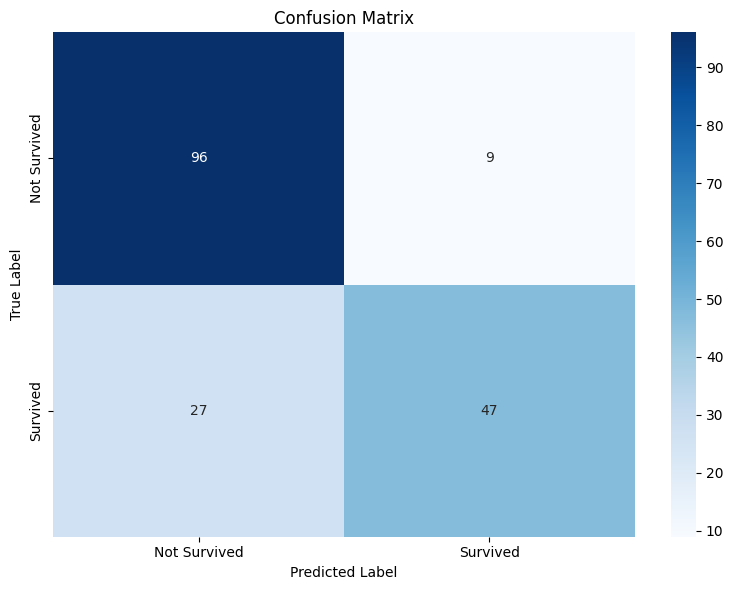

In [67]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(y_test, y_pred, classes = ['Not Survived', 'Survived'])

C:\Users\sanja\AppData\Local\Temp\ipykernel_11476\2333520037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=df, palette='Set1')


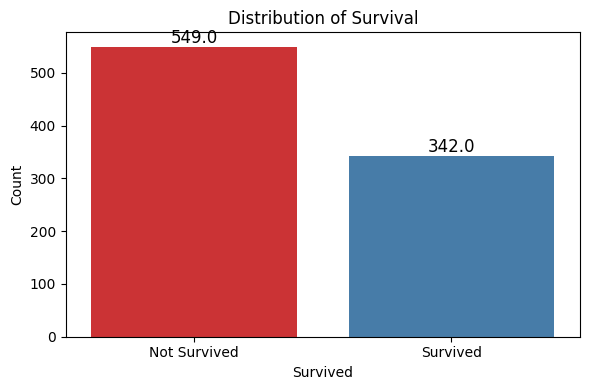

In [68]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Survived', data=df, palette='Set1')

# Add data labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Distribution of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

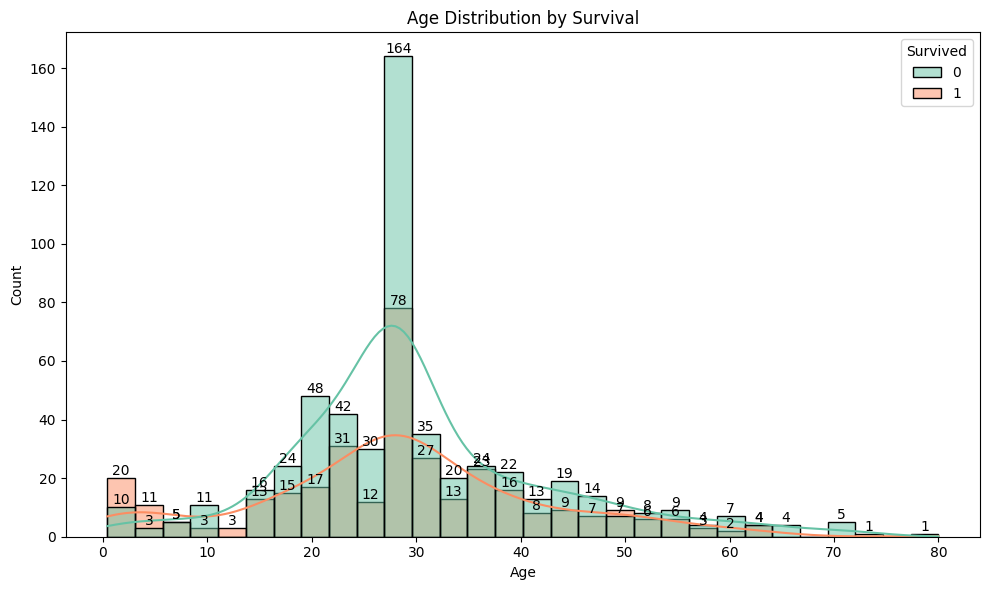

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')

# Add data labels
# Retrieve the patches (bars) for each histogram bin
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        # Get the x-coordinate and the width of the patch
        x = patch.get_x() + patch.get_width() / 2
        y = height
        # Annotate the count value at the top of each bin
        ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

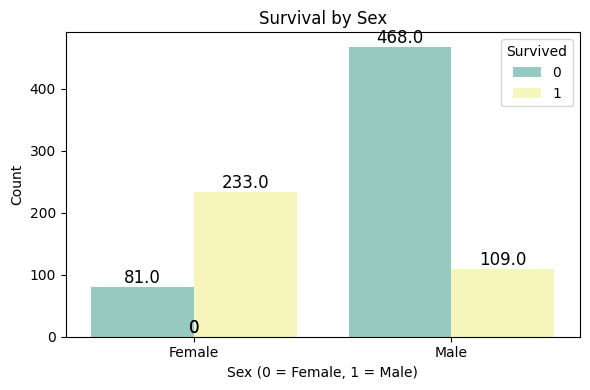

In [70]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='Set3')

# Add data labels
# Iterate over each bar in the countplot
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    # Annotate the count value at the top of each bar
    ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Survival by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.tight_layout()
plt.show()

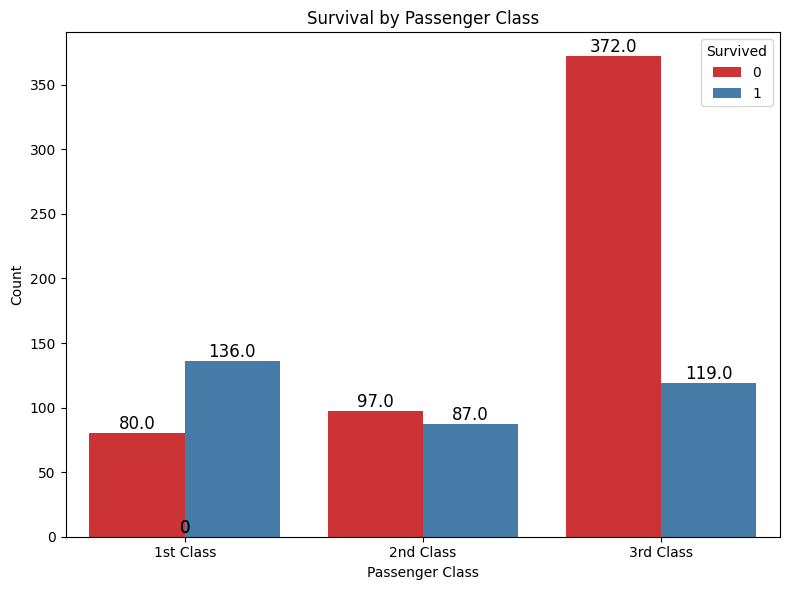

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')

# Add data labels
# Iterate over each bar in the countplot
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = height
    # Annotate the count value at the top of each bar
    ax.text(x, y, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.tight_layout()
plt.show()


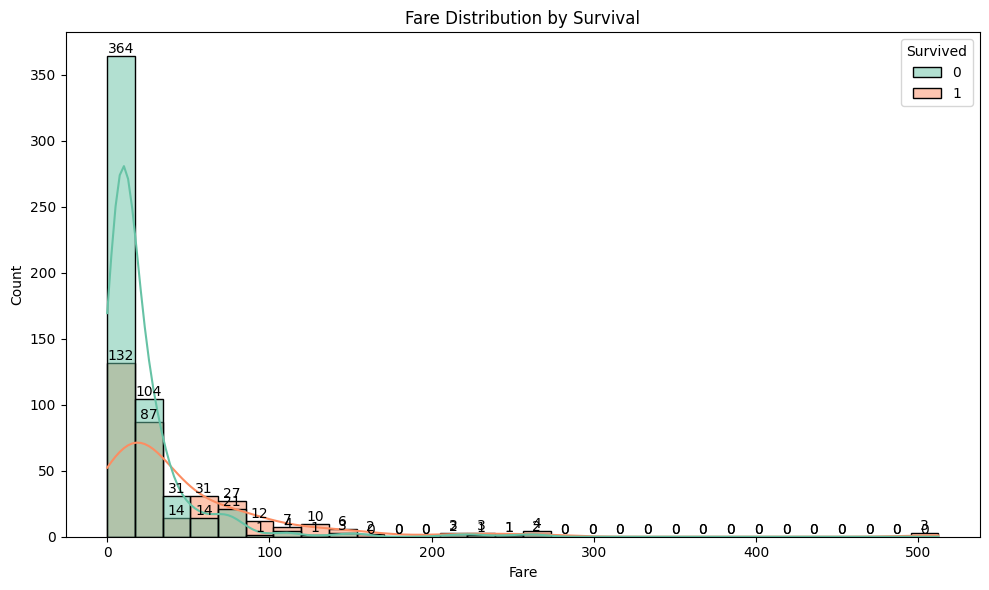

In [72]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x='Fare', hue='Survived', bins=30, kde=True, palette='Set2')

# Extract histogram data
for artist in ax.patches:
    height = artist.get_height()
    width = artist.get_width()
    x = artist.get_x() + width / 2
    y = height
    # Annotate the count value at the top of each bin
    ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

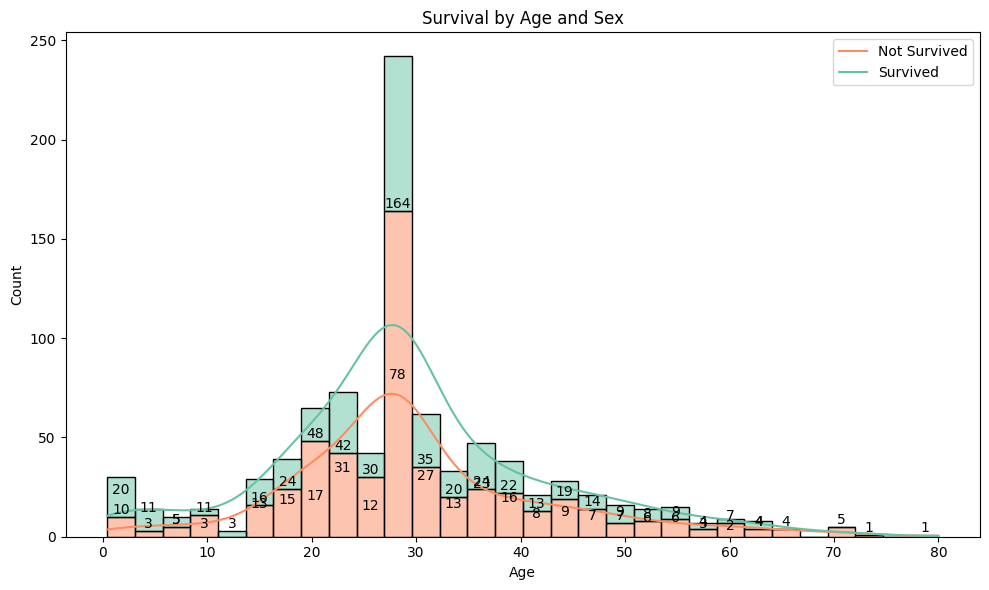

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2', multiple='stack', hue_order=[1, 0])

# Extract histogram data for annotation
for artist in ax.patches:
    height = artist.get_height()
    width = artist.get_width()
    x = artist.get_x() + width / 2
    y = height
    # Annotate the count value at the top of each bin
    if height > 0:  # Only annotate bins with counts greater than 0
        ax.text(x, y, f'{int(height)}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Survival by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

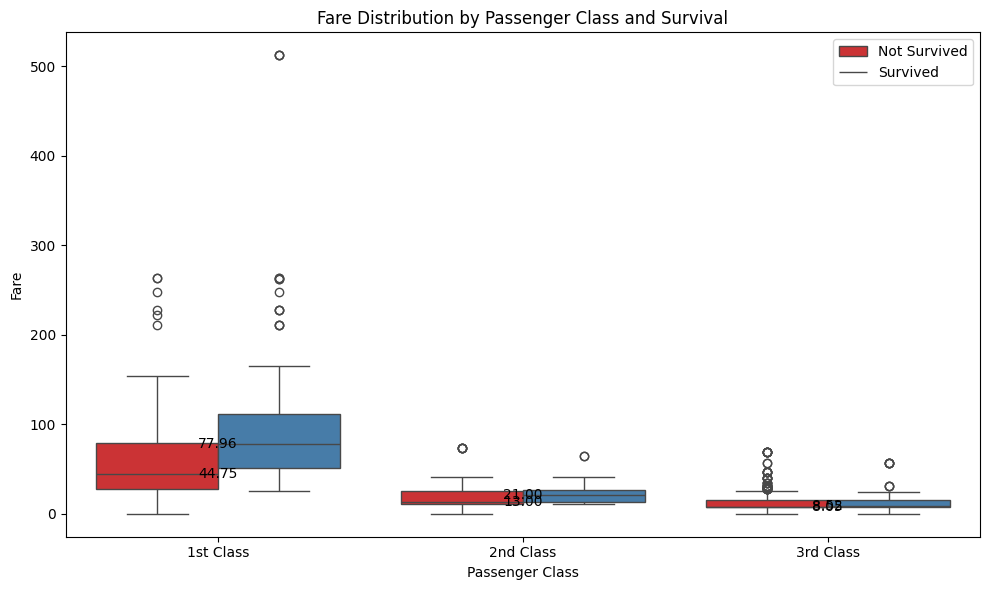

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='Set1')

# Annotate median values
for i, pclass in enumerate(['1st Class', '2nd Class', '3rd Class']):
    for j, survived in enumerate(['Not Survived', 'Survived']):
        subset = df[(df['Pclass'] == i + 1) & (df['Survived'] == (1 if survived == 'Survived' else 0))]
        median = subset['Fare'].median()
        # Position for the label is the median value
        ax.text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='black')

plt.title('Fare Distribution by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

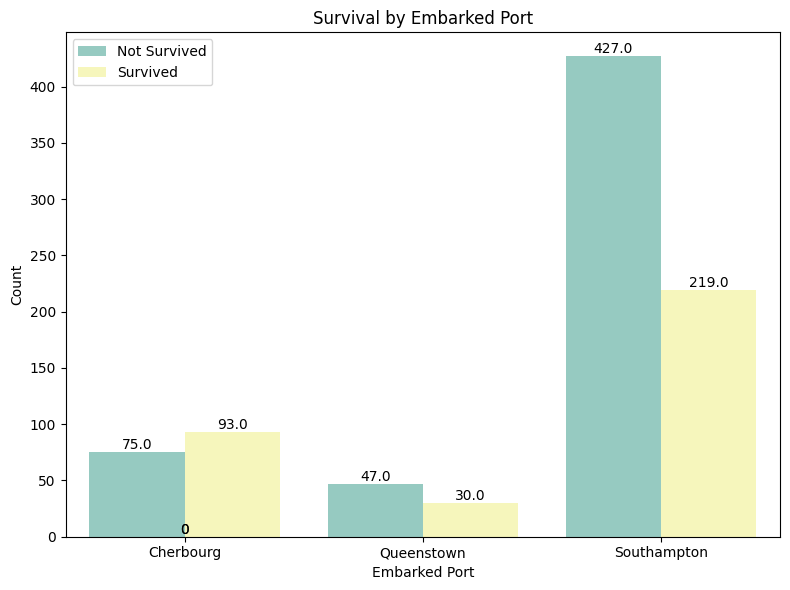

In [75]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set3')

# Annotate the count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Survival by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

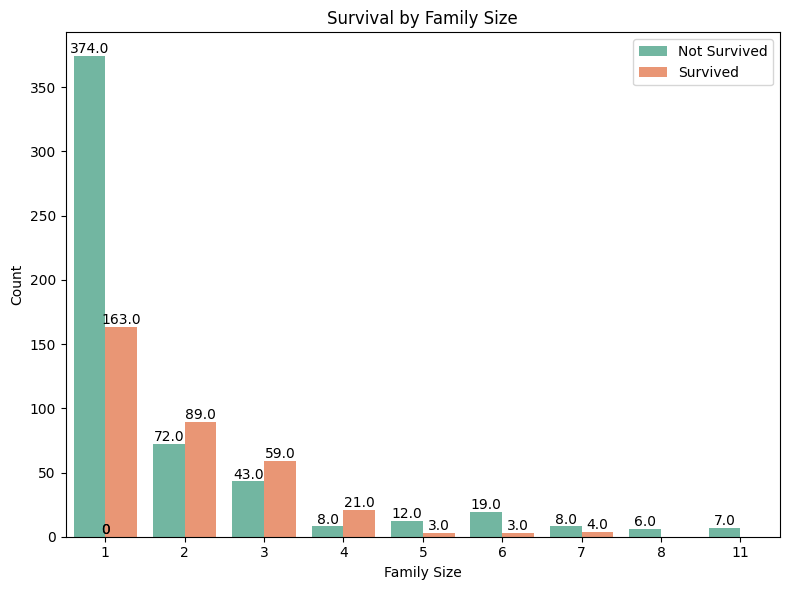

In [76]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Family Size vs. Survival
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Set2')

# Annotate the count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

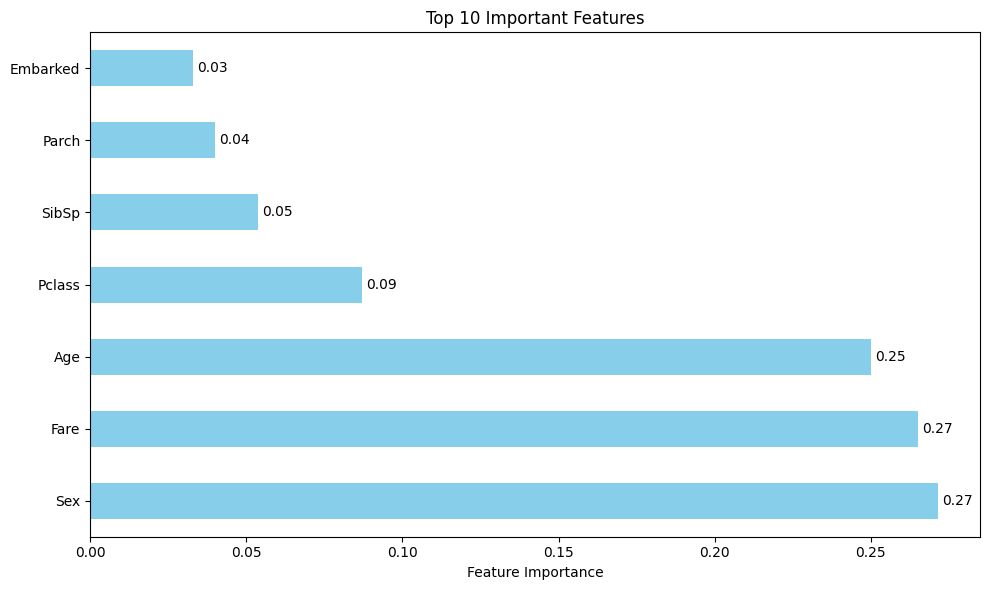

In [77]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)

# Plotting feature importance
plt.figure(figsize=(10, 6))
ax = feature_importance.nlargest(10).plot(kind='barh', color='skyblue')

# Add data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, color='black', fontsize=10)

plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

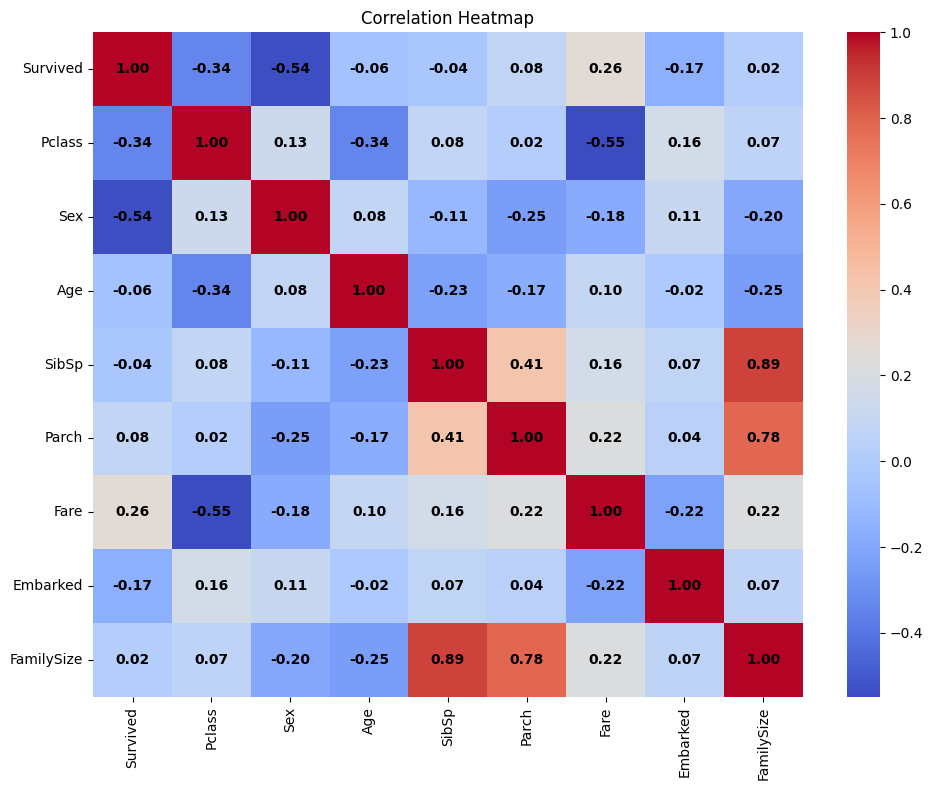

In [78]:
plt.figure(figsize=(10, 8))

# Creating the heatmap with customized annotations
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            annot_kws={"size": 10, "weight": "bold", "color": "black"})

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [79]:
#PREDICTIONS ON SAMPLE PASSENGERS TO SEE WHETHER THEY SURVIVE OR NOT

# Predictions for 10 passengers
passenger_features = [
    [3, 1, 20, 1, 0, 7.25, 2],
    [1, 0, 38, 1, 0, 71.2833, 0],
    [3, 0, 26, 0, 0, 7.925, 2],
    [1, 1, 35, 1, 0, 53.1, 2],
    [3, 1, 35, 0, 0, 8.05, 2],
    [2, 0, 27, 1, 0, 11.1333, 2],
    [3, 0, 14, 0, 0, 30.0708, 0],
    [2, 0, 4, 1, 1, 16.7, 2],
    [3, 0, 58, 0, 0, 7.2292, 0],
    [1, 1, 20, 0, 1, 82.1708, 0]
]

# Make predictions
predictions = rf_classifier.predict(passenger_features)

# Print predictions
for i, pred in enumerate(predictions):
    print(f"Passenger {i+1}: {'Survived' if pred == 1 else 'Did not survive'}")



Passenger 1: Did not survive
Passenger 2: Survived
Passenger 3: Survived
Passenger 4: Did not survive
Passenger 5: Did not survive
Passenger 6: Survived
Passenger 7: Did not survive
Passenger 8: Survived
Passenger 9: Survived
Passenger 10: Did not survive


C:\Users\sanja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
